## Package installation and imports

Unless these packages have already been installed, run `conda install pandas numpy matplotlib` in a new cell below.

**Note:** First time installation may take a few minutes, depending on your hardware. When complete, rerun to verify that the install was successful.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

path = "data.csv"
dataset = pd.read_csv(path)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data overview

Looking at this data, there seems to be many possibilities here to draw meaningful insights.

Some data I would like to investigate further and that I think could aid in producing meaningful insight are:

- Additions over time
- Looking deeper into the distribution of production countries for existing content
- Content type
- Content rating
- Content genres
- Duration
- Changes in all the above over time.

Knowing there is a fair bit of data missing, we'll have to clean our dataset before proceeding to our analysis. We also have to ensure that our data is correctly entered so that can be sure we don't have data fields that will skew any projection we'll later be making.

# Data processing
We begin by filtering for and filling out missing values wherever it seems reasonable to do so. 

In [3]:
 dataset.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We beghin with filling in the empty rows for the `director`, `cast` and `country` columns, before investigating the `date_added`, `rating` and `duration` columns further. 

There being so few missing fields of data for these rows might indicate that something else is wrong, so let's investigate.

In [4]:
dataset.director = dataset.director.fillna("missing data")
dataset.cast = dataset.cast.fillna("missing data")
dataset.country = dataset.country.fillna("missing data")
dataset.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [5]:
dataset.iloc[np.where(dataset.date_added.isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,missing data,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,missing data,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,missing data,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,missing data,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,missing data,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,missing data,Igor Dmitriev,missing data,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,missing data,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,missing data,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,missing data,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,missing data,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Looking over `date_added` we can tell that its values are simply missing. In addition, that the values to the right and left for it does not appear to have accidentally received its value.

We'll therefore assign these elements with the `missing value` string. before doing the same check on the final two columns.

In [6]:
dataset.date_added.iloc[np.where(dataset.date_added.isna())] = "missing data"

In [7]:
dataset.iloc[np.where(dataset.rating.isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,missing data,"Oprah Winfrey, Ava DuVernay",missing data,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,missing data,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,missing data,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [8]:
dataset.rating.iloc[np.where(dataset.rating.isna())] = "missing data"

In [9]:
dataset.iloc[np.where(dataset.duration.isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Looking at the missing duration data, we can quickly tell that the missing `duration` data actually exists in the `rating` column. 

To fix this, replace the missing data in these three `duration` cells with the correct data, then set the wrongful `rating` data as missing.

In [10]:
dataset.duration.iloc[np.where(dataset.duration.isna())] = \
dataset.rating.iloc[np.where(dataset.duration.isna())]

In [11]:
dataset.rating.iloc[[5541, 5794, 5813]] = "missing value"

In [12]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now that we've cleared up our data for missing values, we're ready to start analyzing our dataset. 

## Productions by country
Beginning our analysis, we look into the `country` column to find at the frequency of productions by country.

In [13]:
dataset.country.value_counts()

United States                             2818
India                                      972
missing data                               831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

Checking for unique values, we see that there is a very large quantity of unique values, one much greater than the total number of countries. This makes it tricky to immediately assess productions by country. 

Seeing as the different countries of production are separated by commas, we'll have to split by the comma symbol, then summarize the result by the number of occurances.

In [14]:
countries_sorted = dataset.country.apply(lambda x: pd.value_counts(x.split(", "))).sum()

countries_sorted.sort_values(ascending=False).to_string()

'United States           3689.0\nIndia                   1046.0\nmissing data             831.0\nUnited Kingdom           804.0\nCanada                   445.0\nFrance                   393.0\nJapan                    318.0\nSpain                    232.0\nSouth Korea              231.0\nGermany                  226.0\nMexico                   169.0\nChina                    162.0\nAustralia                160.0\nEgypt                    117.0\nTurkey                   113.0\nHong Kong                105.0\nNigeria                  103.0\nItaly                    100.0\nBrazil                    97.0\nArgentina                 91.0\nBelgium                   90.0\nIndonesia                 90.0\nTaiwan                    89.0\nPhilippines               83.0\nThailand                  70.0\nSouth Africa              62.0\nColombia                  52.0\nNetherlands               50.0\nDenmark                   48.0\nIreland                   46.0\nSweden                    42.0\nSingapo

Looping over our countries column with a lambda function that splits every element at the position of `, ` we can tell we've still got a few errors in our now greatly reduced number of results.

To fix this, we try reworking our lambda function, so that it first turns every **comma + space** value into just a comma, before splitting at the comma value.

In [15]:
countries_sorted = dataset.country.apply(lambda x: pd.value_counts(x.replace(", ", ",").split(","))).sum()

pd.set_option('display.max_rows', 200)
countries_sorted.sort_values(ascending=False)

United States           3690.0
India                   1046.0
missing data             831.0
United Kingdom           806.0
Canada                   445.0
France                   393.0
Japan                    318.0
Spain                    232.0
South Korea              231.0
Germany                  226.0
Mexico                   169.0
China                    162.0
Australia                160.0
Egypt                    117.0
Turkey                   113.0
Hong Kong                105.0
Nigeria                  103.0
Italy                    100.0
Brazil                    97.0
Argentina                 91.0
Belgium                   90.0
Indonesia                 90.0
Taiwan                    89.0
Philippines               83.0
Thailand                  70.0
South Africa              62.0
Colombia                  52.0
Netherlands               50.0
Denmark                   48.0
Ireland                   46.0
Sweden                    42.0
Poland                    41.0
Singapor

While we now separated all values by comma, and managed to remove commas at the end, we still have two more results to get rid of, one consisting of empty values, and one of the missing data label we gave to empty cells prior.

In [16]:
countries_sorted = countries_sorted.drop(labels=["", "missing data"])
countries_sorted.sort_values(ascending=False)

United States           3690.0
India                   1046.0
United Kingdom           806.0
Canada                   445.0
France                   393.0
Japan                    318.0
Spain                    232.0
South Korea              231.0
Germany                  226.0
Mexico                   169.0
China                    162.0
Australia                160.0
Egypt                    117.0
Turkey                   113.0
Hong Kong                105.0
Nigeria                  103.0
Italy                    100.0
Brazil                    97.0
Argentina                 91.0
Belgium                   90.0
Indonesia                 90.0
Taiwan                    89.0
Philippines               83.0
Thailand                  70.0
South Africa              62.0
Colombia                  52.0
Netherlands               50.0
Denmark                   48.0
Ireland                   46.0
Sweden                    42.0
Poland                    41.0
Singapore                 41.0
United A

With that, our `countries` column should be ready for further investigation

### Visualizing the country data

We begin by visualizing by quantity, in order to gain a better understanding of the difference between the most popular production countries.

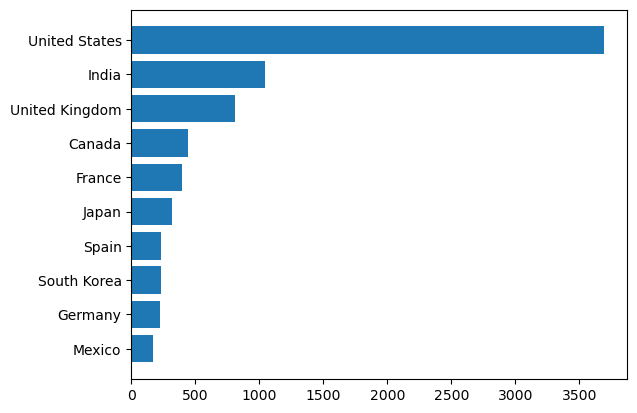

In [19]:
top_countries = countries_sorted.nlargest(n=10, keep="first")
plt.barh( top_countries.index, top_countries)
plt.gca().invert_yaxis()

In [21]:
countries_sorted.info()

<class 'pandas.core.series.Series'>
Index: 122 entries, United States to Montenegro
Series name: None
Non-Null Count  Dtype  
--------------  -----  
122 non-null    float64
dtypes: float64(1)
memory usage: 6.0+ KB


With there being as many as *122* different countries to work with, only looking at the top 10 leaves out a lot of data that could prove meaningful later.

To counteract this, we will sort our results into `bins` based on the number of productions to give a more wholesome overview of the data in its entirety.

In [23]:
freq_bins = [0, 1, 10, 100, 250, 500, 3690]
bins_text = ["1", "2-10", "11-100", "101-250", "251-500", "501+"]
bin_categories = pd.cut(countries_sorted, freq_bins, labels=bins_text)
bin_viz = pd.value_counts(bin_categories).sort_index(ascending=True)

bin_viz

1          38
2-10       32
11-100     36
101-250    10
251-500     3
501+        3
dtype: int64

With this, we can improve on our initial bar chart visualization, and blend it into a visualization of quantities by bin size, to give a better understanding of the data as a whole.

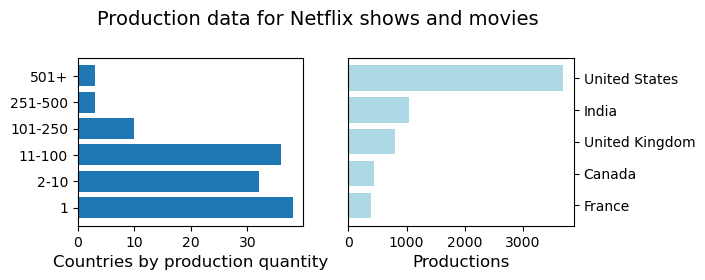

In [96]:
fig = plt.figure()
fig.suptitle("Production data for Netflix shows and movies", fontsize="14")
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.barh(bins_text, bin_viz)
ax1.set_xlabel("Countries by production quantity", fontsize="12")

top_countries = countries_sorted.nlargest(n=5, keep="first")
ax2.barh(top_countries.index, top_countries, color="lightblue")
ax2.set_xlabel("Productions", fontsize="12")
ax2.invert_yaxis()
ax2.tick_params()
ax2.yaxis.tick_right()

plt.show()